<a href="https://colab.research.google.com/github/chalistahazizah/Sales_Analysis/blob/main/ANALISIS_PENJUALAN_WARUNG_BU_YUNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.ticker as mticker
from IPython.display import display
from tabulate import tabulate

### **Read Data**

In [2]:
df=pd.read_csv('/content/sample_data/penjualan_terbaru.csv')

print("Jumlah data :", df.shape[0])
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

Jumlah data : 3807
+---+----+------------+------------+-------------+--------------+
|   | ID |  TANGGAL   | PEMBAYARAN | NAMA PRODUK | HARGA PRODUK |
+---+----+------------+------------+-------------+--------------+
| 0 | 1  | 01-08-2024 |    QRIS    |  MIE AYAM   |    12000     |
| 1 | 2  | 01-08-2024 |    QRIS    |  MIE AYAM   |    12000     |
| 2 | 3  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
| 3 | 4  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
| 4 | 5  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
+---+----+------------+------------+-------------+--------------+


### **Preprocessing Data**

In [3]:
# Menyesuaikan tipe data
df['ID'] = df['ID'].astype(int)
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y', errors='coerce')
df['PEMBAYARAN'] = df['PEMBAYARAN'].astype(str)
df['NAMA PRODUK'] = df['NAMA PRODUK'].astype(str)
df['HARGA PRODUK'] = pd.to_numeric(df['HARGA PRODUK'], errors='coerce').fillna(0).astype(int)
print("Tipe data:\n", df.dtypes, "\n")

# Menghilangkan duplikat
print("Jumlah data sebelum menghapus duplikat:", df.shape[0])
df_no_duplicates = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df_no_duplicates.shape[0])

# Menghilangkan missing value
print("Jumlah data sebelum menghilangkan missing value:", df_no_duplicates.shape[0])
df_cleaned = df_no_duplicates.dropna()
print("Jumlah data setelah menghilangkan missing value:", df_cleaned.shape[0],"\n")

print(df.head())


Tipe data:
 ID                       int64
TANGGAL         datetime64[ns]
PEMBAYARAN              object
NAMA PRODUK             object
HARGA PRODUK             int64
dtype: object 

Jumlah data sebelum menghapus duplikat: 3807
Jumlah data setelah menghapus duplikat: 3807
Jumlah data sebelum menghilangkan missing value: 3807
Jumlah data setelah menghilangkan missing value: 3807 

   ID    TANGGAL PEMBAYARAN NAMA PRODUK  HARGA PRODUK
0   1 2024-08-01       QRIS    MIE AYAM         12000
1   2 2024-08-01       QRIS    MIE AYAM         12000
2   3 2024-08-01       QRIS    GORENGAN          1000
3   4 2024-08-01       QRIS    GORENGAN          1000
4   5 2024-08-01       QRIS    GORENGAN          1000


### **Penjualan Terbanyak**

In [85]:
top_sales = df_cleaned['TANGGAL'].value_counts().reset_index()
top_sales.columns = ['TANGGAL', 'JUMLAH PENJUALAN']
print("Jumlah penjualan berdasarkan tanggal:\n", top_sales)

Jumlah penjualan berdasarkan tanggal:
       TANGGAL  JUMLAH PENJUALAN
0  2024-08-06               277
1  2024-08-13               264
2  2024-08-12               252
3  2024-08-27               215
4  2024-08-05               201
5  2024-08-08               201
6  2024-08-09               198
7  2024-08-20               188
8  2024-08-14               177
9  2024-08-15               176
10 2024-08-02               169
11 2024-08-29               164
12 2024-08-01               164
13 2024-08-07               156
14 2024-08-19               148
15 2024-08-23               145
16 2024-08-22               132
17 2024-08-30               126
18 2024-08-21               125
19 2024-08-16               122
20 2024-08-26               104
21 2024-08-28               103


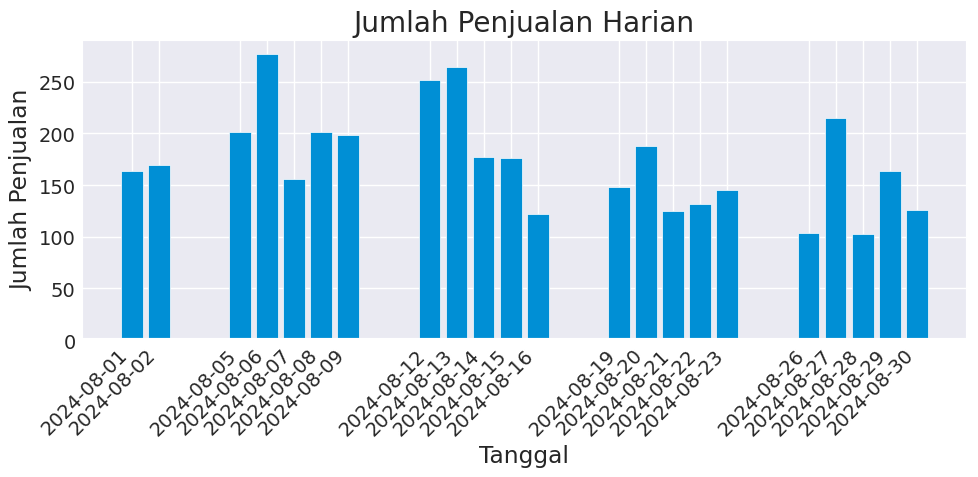

In [88]:
plt.figure(figsize=(10, 5))
plt.bar(top_sales['TANGGAL'], top_sales['JUMLAH PENJUALAN'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.title('Jumlah Penjualan Harian')
plt.xticks(top_sales['TANGGAL'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Pendapatan Terbanyak**

In [59]:
top_revenue = df_cleaned.groupby('TANGGAL')['HARGA PRODUK'].sum().reset_index()
top_revenue = top_revenue.sort_values(by='HARGA PRODUK', ascending=False)
print("Jumlah pendapatan berdasarkan tanggal:\n", top_revenue)


Jumlah pendapatan berdasarkan tanggal:
       TANGGAL  HARGA PRODUK
3  2024-08-06       2365000
7  2024-08-12       2187500
8  2024-08-13       2169000
18 2024-08-27       1814500
5  2024-08-08       1794500
2  2024-08-05       1707000
6  2024-08-09       1688500
9  2024-08-14       1563000
13 2024-08-20       1518000
10 2024-08-15       1509500
1  2024-08-02       1483000
0  2024-08-01       1426500
20 2024-08-29       1398000
12 2024-08-19       1304500
16 2024-08-23       1267000
4  2024-08-07       1262500
14 2024-08-21       1086500
21 2024-08-30       1082500
15 2024-08-22       1045000
11 2024-08-16       1003500
19 2024-08-28        876500
17 2024-08-26        865000


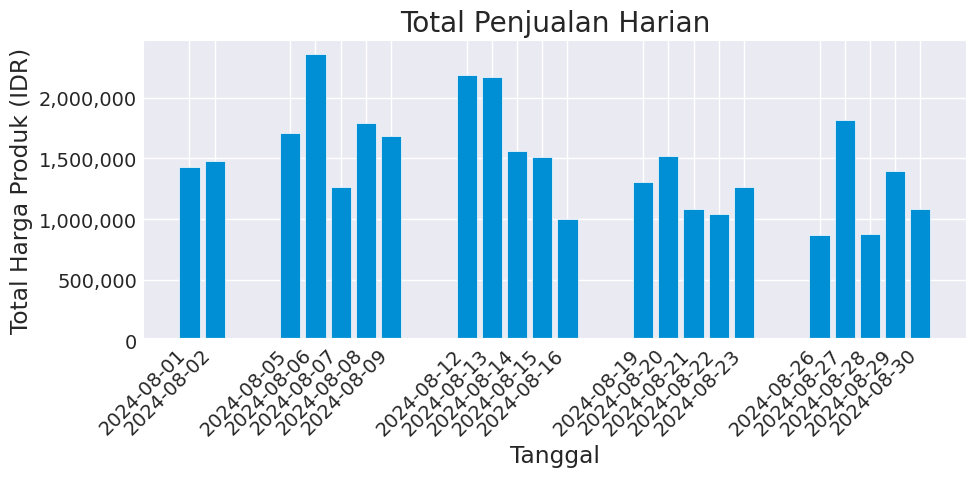

In [82]:
plt.figure(figsize=(10, 5))
plt.bar(top_revenue['TANGGAL'], top_revenue['HARGA PRODUK'])
plt.xlabel('Tanggal')
plt.ylabel('Total Harga Produk (IDR)')
plt.title('Total Penjualan Harian')
plt.xticks(top_revenue['TANGGAL'], rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### **Metode Pembayaran Terbanyak**

In [ ]:
df['PEMBAYARAN'].value_counts()

,count
PEMBAYARAN,
QRIS,3545
CASH,262


In [ ]:
hasil2 = df['PEMBAYARAN'].value_counts()

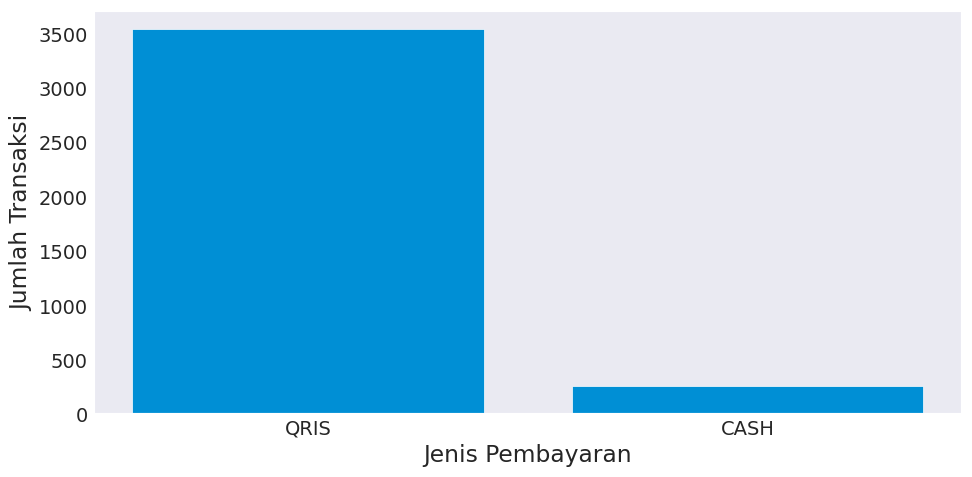

In [ ]:
pembayaran = hasil2.index  # Mengambil nama-nama jenis pembayaran
plt.figure(figsize=(10, 5))
plt.bar(pembayaran, hasil2.values)  # Menggunakan jumlah frekuensi pembayaran
plt.xticks(pembayaran)

plt.ylabel('Jumlah Transaksi')
plt.xlabel('Jenis Pembayaran')

# Nonaktifkan format eksponensial di sumbu Y
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

plt.grid()
plt.show()

### **Jenis Pembayaran Tiap Produk**

[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

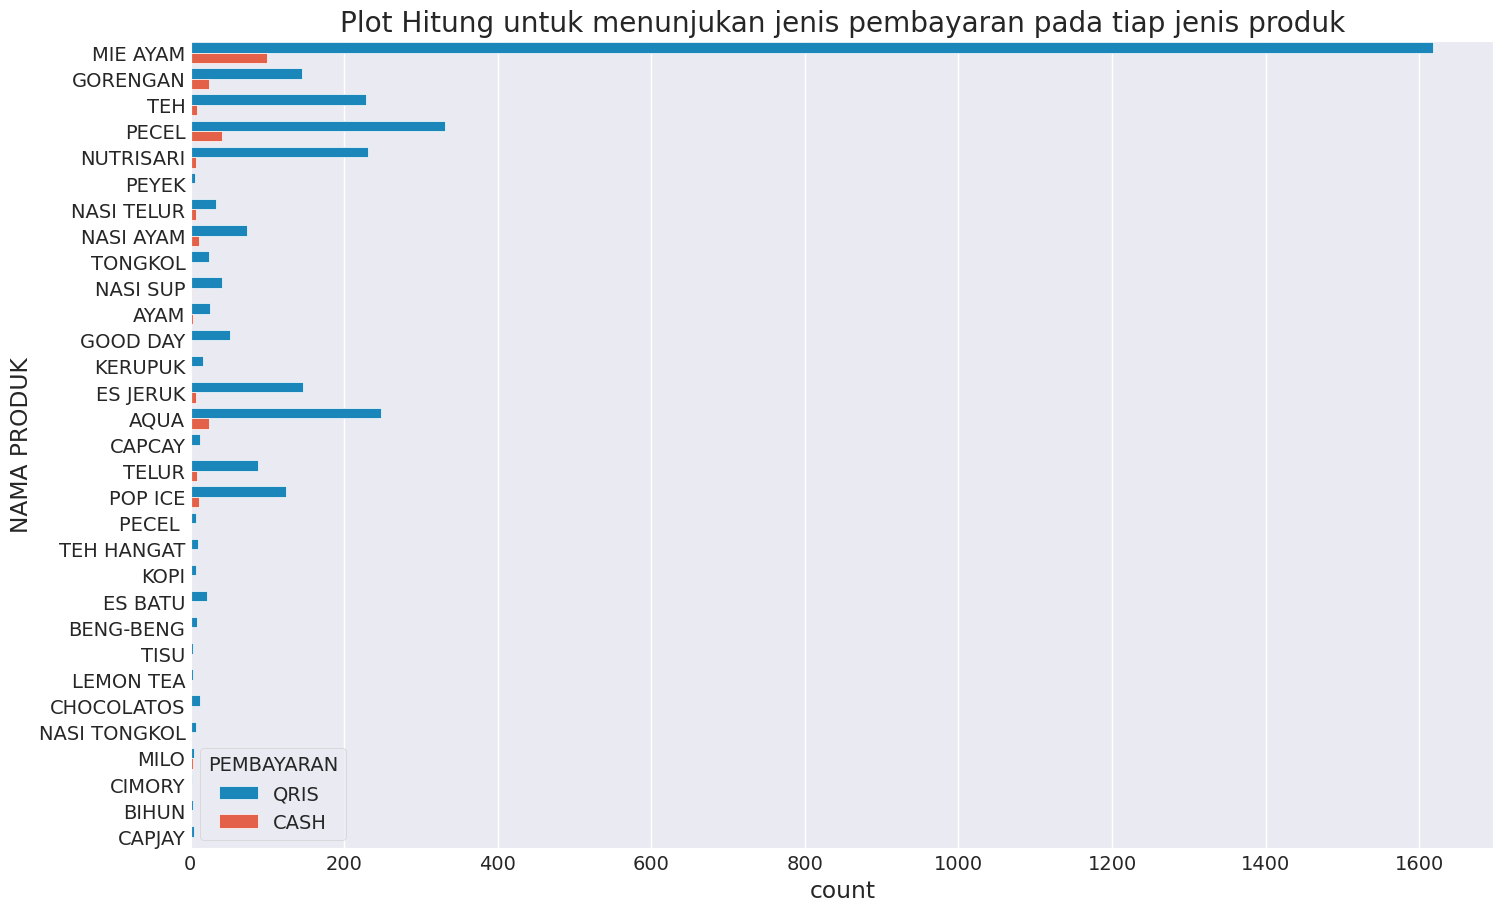

In [ ]:
plt.figure(figsize= (15,10))
sns.countplot(y='NAMA PRODUK', data= df, hue='PEMBAYARAN').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

### **Jumlah Pembelian Tiap Produk**

In [ ]:
jumlah_produk = df.groupby('NAMA PRODUK').size().reset_index(name='Jumlah')

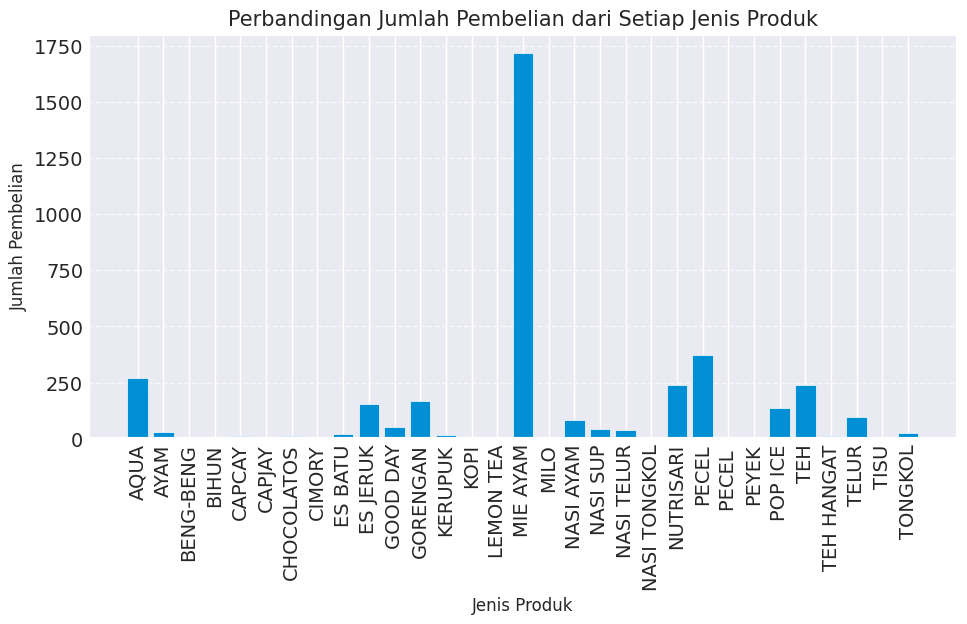

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(jumlah_produk['NAMA PRODUK'], jumlah_produk['Jumlah'])
plt.xticks(rotation='vertical')
plt.title('Perbandingan Jumlah Pembelian dari Setiap Jenis Produk', fontsize=15)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Jumlah Transaksi Pembelian Tiap Produk**

In [ ]:
total_harga = df.groupby('NAMA PRODUK', as_index=False)['HARGA PRODUK'].sum()

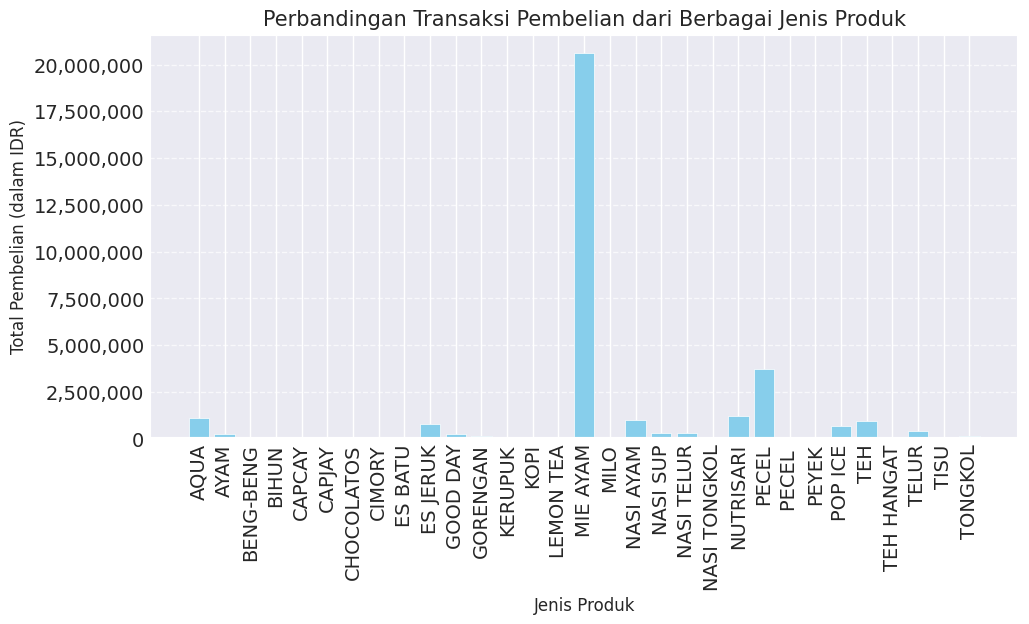

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(total_harga['NAMA PRODUK'], total_harga['HARGA PRODUK'], color='skyblue')
plt.xticks(rotation='vertical')
plt.title('Perbandingan Transaksi Pembelian dari Berbagai Jenis Produk', fontsize=15)
plt.ylabel('Total Pembelian (dalam IDR)', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Agregasi data berdasarkan 'NAMA PRODUK'
jentrans = df.groupby('NAMA PRODUK').agg(
    Jumlah=('ID', 'count'),  # Hitung jumlah transaksi atau produk terjual
    Total=('HARGA PRODUK', 'sum')  # Hitung total harga per produk
).reset_index()

# Mengurutkan data berdasarkan nama produk dan membulatkan nilai total
jentrans = jentrans.sort_values('NAMA PRODUK', ascending=True)
jentrans['Total'] = jentrans['Total'].round(2)

# Tampilkan tabel
print(jentrans)

display(jentrans)

     NAMA PRODUK  Jumlah     Total
0           AQUA     272   1088000
1           AYAM      29    232000
2      BENG-BENG       9     54000
3          BIHUN       3      9000
4         CAPCAY      12     36000
5         CAPJAY       5     15000
6     CHOCOLATOS      12     84000
7         CIMORY       3     27000
8        ES BATU      22     22000
9       ES JERUK     154    770000
10      GOOD DAY      52    260000
11      GORENGAN     169    169000
12       KERUPUK      17     25500
13          KOPI       8     40000
14     LEMON TEA       3     15000
15      MIE AYAM    1718  20616000
16          MILO       8     56000
17     NASI AYAM      85   1004000
18      NASI SUP      43    301000
19    NASI TELUR      40    320000
20  NASI TONGKOL       9     81000
21     NUTRISARI     238   1206000
22         PECEL     373   3730000
23        PECEL        8     80000
24         PEYEK       6     12000
25       POP ICE     135    675000
26           TEH     238    927500
27    TEH HANGAT    

,NAMA PRODUK,Jumlah,Total
0,AQUA,272,1088000
1,AYAM,29,232000
2,BENG-BENG,9,54000
3,BIHUN,3,9000
4,CAPCAY,12,36000
5,CAPJAY,5,15000
6,CHOCOLATOS,12,84000
7,CIMORY,3,27000
8,ES BATU,22,22000
9,ES JERUK,154,770000
